#About Dataset

Dataset contains healthcare statistics and categorical information about patients who have been diagnosed with AIDS. This datsset comes from Kaggle : https://www.kaggle.com/datasets/aadarshvelu/aids-virus-infection-prediction/data



---

**Attribute Information :**

time: time to failure or censoring

trt: treatment indicator (0 = ZDV only; 1 = ZDV + ddI, 2 = ZDV + Zal, 3 = ddI only)

age: age (yrs) at baseline

wtkg: weight (kg) at baseline

hemo: hemophilia (0=no, 1=yes)

homo: homosexual activity (0=no, 1=yes)

drugs: history of IV drug use (0=no, 1=yes)

karnof: Karnofsky score (on a scale of 0-100)

oprior: Non-ZDV antiretroviral therapy pre-175 (0=no, 1=yes)

z30: ZDV in the 30 days prior to 175 (0=no, 1=yes)

preanti: days pre-175 anti-retroviral therapy

race: race (0=White, 1=non-white)

gender: gender (0=F, 1=M)

str2: antiretroviral history (0=naive, 1=experienced)

strat: antiretroviral history stratification (1='Antiretroviral Naive',2='> 1 but <= 52 weeks of prior antiretroviral therapy',3='> 52 weeks)

symptom: symptomatic indicator (0=asymp, 1=symp)

treat: treatment indicator (0=ZDV only, 1=others)

offtrt: indicator of off-trt before 96+/-5 weeks (0=no,1=yes)

cd40: CD4 at baseline

cd420: CD4 at 20+/-5 weeks

cd80: CD8 at baseline

cd820: CD8 at 20+/-5 weeks

infected: is infected with AIDS (0=No, 1=Yes)

Additional Variable Information :

Personal information (age, weight, race, gender, sexual activity)

Medical history (hemophilia, history of IV drugs)

Treatment history (ZDV/non-ZDV treatment history)

Lab results (CD4/CD8 counts)


---

**Goal:**

Explore and analyze a dataset to predict the infection status of individuals based on various features.


---


**Models:**

*Logistics Regression

*Naive Bayes

*Decision Tree Classifier

*Random Forest Classifier + Grid Search

*Multi Layer Perceptron

*Xtreme Gradient Boosting

#Libraries

In [550]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [551]:
df = pd.read_csv("/content/AIDS_Classification_50000.csv")

#EDA

In [552]:
df.head(10)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0
5,564,2,37,71.87923,0,1,0,90,0,1,...,1,2,0,1,1,520,543,740,694,1
6,406,0,27,86.94414,0,1,0,100,0,1,...,1,2,0,0,0,274,314,1563,664,0
7,1044,1,36,69.46018,0,1,1,90,0,0,...,0,1,0,1,1,338,640,2572,741,0
8,522,0,52,67.55010,0,1,0,100,0,1,...,1,1,0,1,1,418,513,1496,622,0
9,494,2,39,93.49177,0,1,0,100,0,0,...,1,3,1,1,1,375,330,1339,1398,0


In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

In [554]:
df.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.164020,75.861991,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,...,0.575200,1.936420,0.083460,0.734160,0.342220,319.079540,438.090100,1045.936440,905.938440,0.310120
std,307.288688,1.233272,7.091152,12.028730,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,...,0.494318,0.895318,0.276579,0.441784,0.474458,102.525976,144.806831,488.617434,339.707976,0.462547
min,66.000000,0.000000,12.000000,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,68.000000,149.830870,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,930.000000,1119.000000,4656.000000,3538.000000,1.000000


In [555]:
df.isna().sum()

,0
time,0
trt,0
age,0
wtkg,0
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0


In [556]:
df.duplicated().sum()

0

In [557]:
#column 'time' can be dropped

In [558]:
df = df.drop("time", axis=1)

In [559]:
#sns.pairplot(df, hue="infected")

Text(0, 0.5, 'Number of Infections')

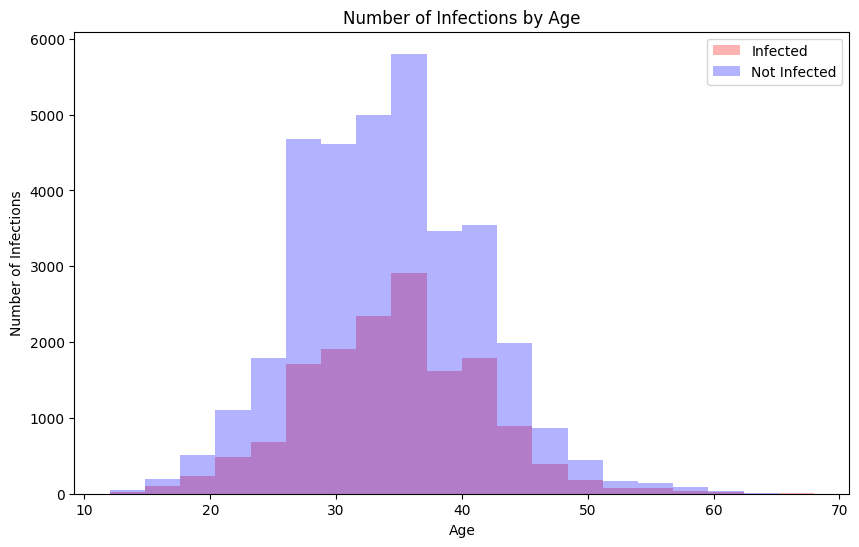

In [560]:
plt.figure(figsize=(10, 6))
plt.hist(df[df["infected"] == 1]["age"], bins=20, alpha = 0.3,label="Infected", color="red")
plt.hist(df[df["infected"] == 0]["age"], bins=20, alpha = 0.3, label="Not Infected", color="blue")
plt.legend()
plt.title("Number of Infections by Age")
plt.xlabel("Age")
plt.ylabel("Number of Infections")

Text(0.5, 0, 'Gender')

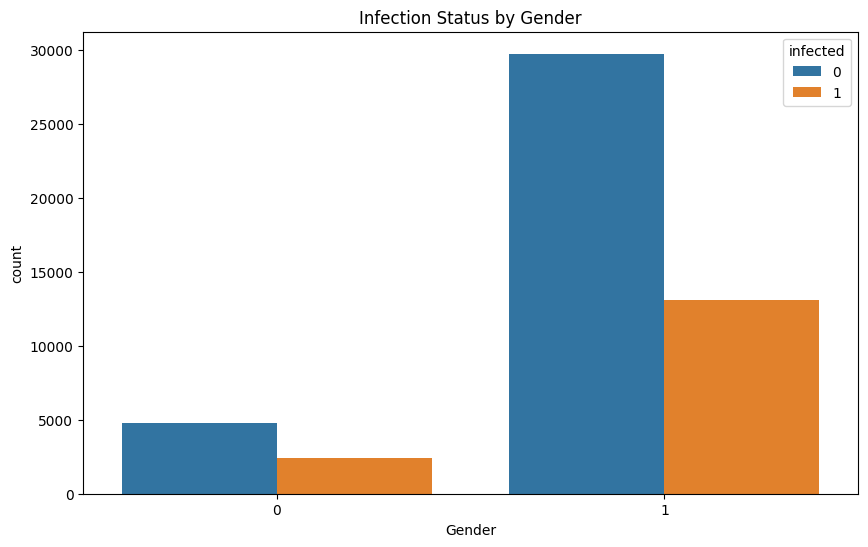

In [561]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='infected', data=df)
plt.title('Infection Status by Gender')
plt.xlabel('Gender')

## Outliers

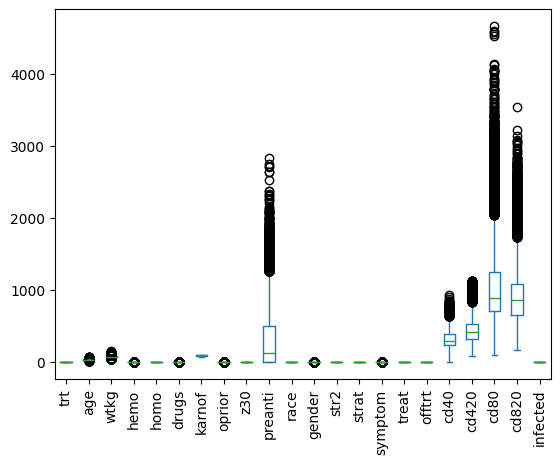

In [562]:
df.plot(kind='box')
plt.xticks(rotation=90);

<ipython-input-563-c438b75e7ee8>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


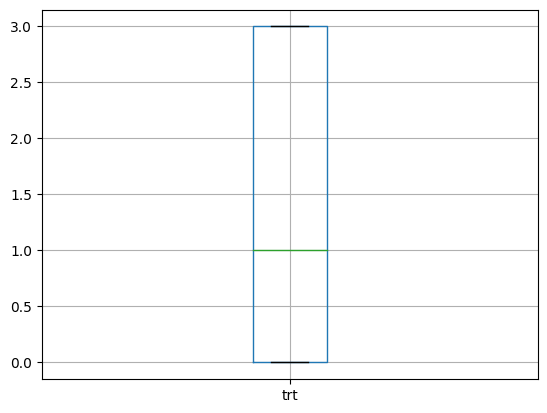

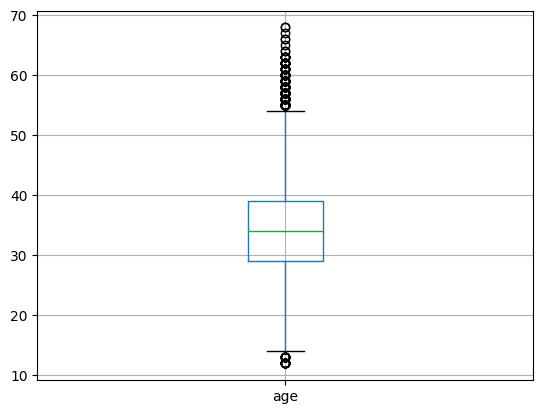

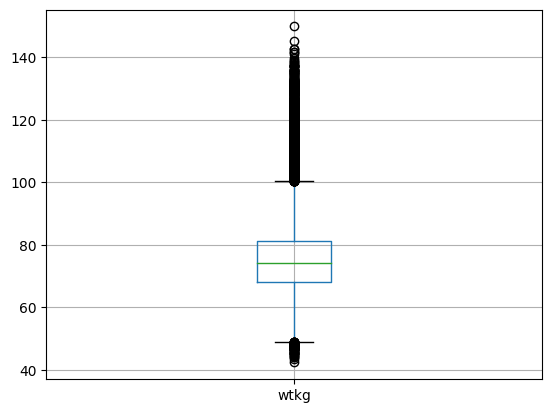

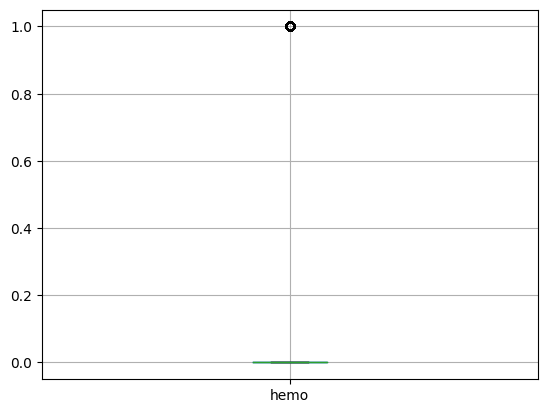

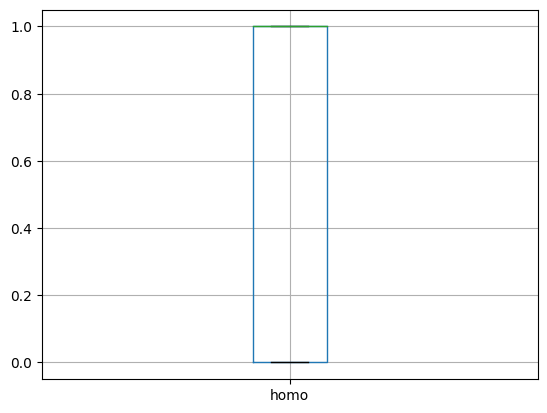

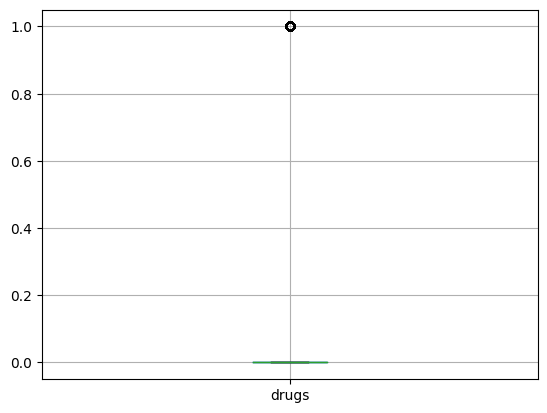

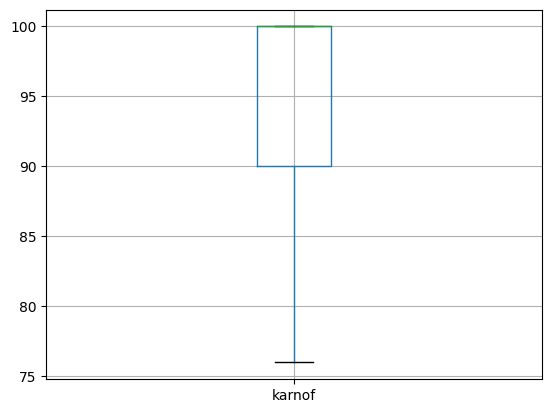

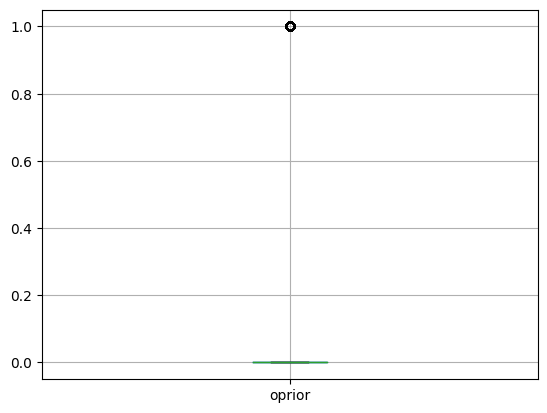

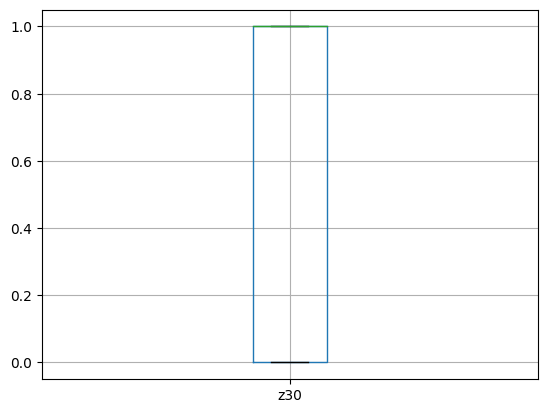

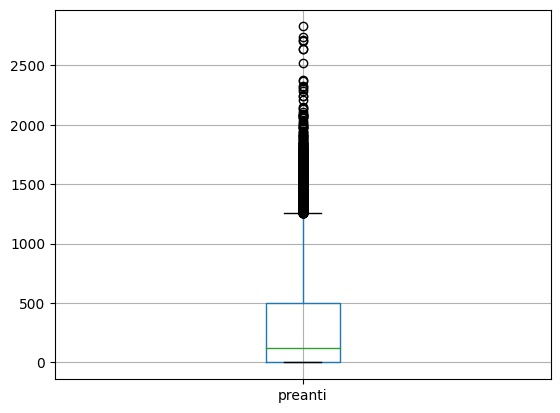

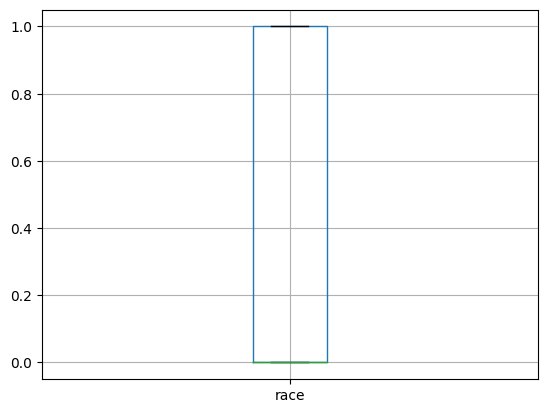

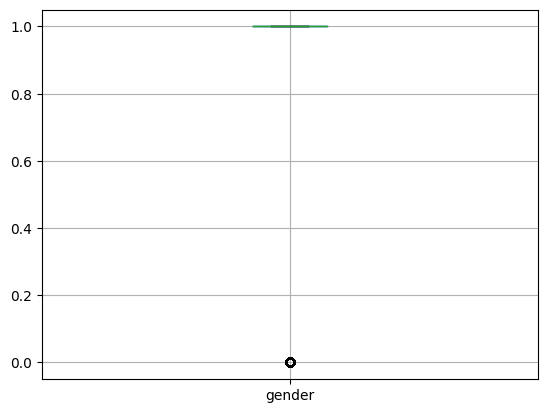

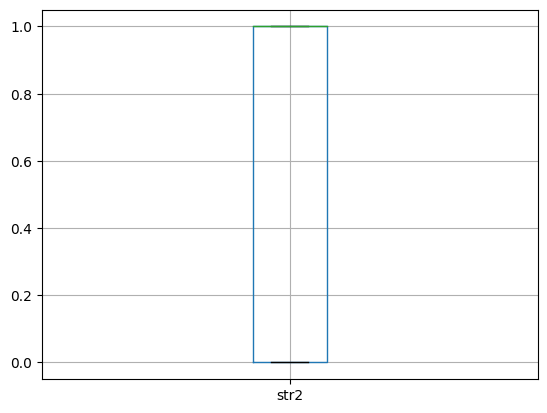

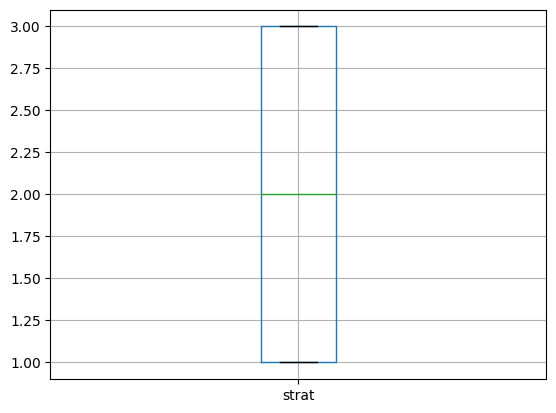

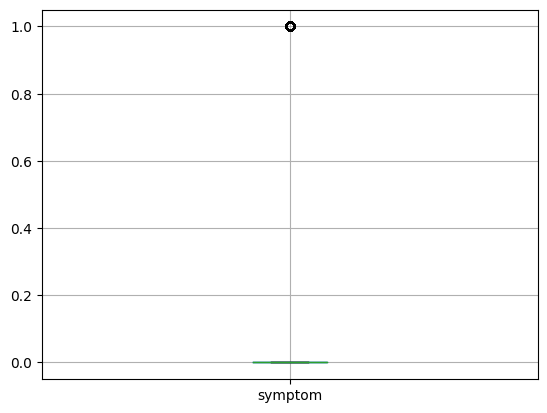

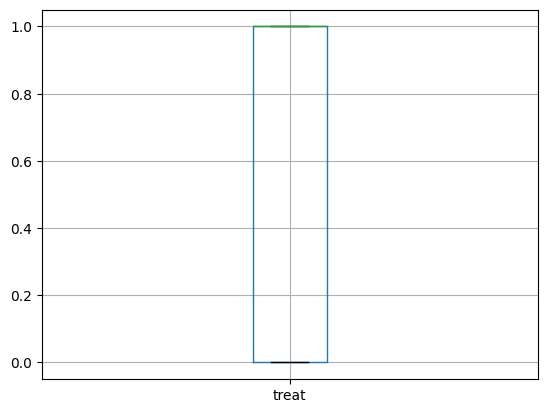

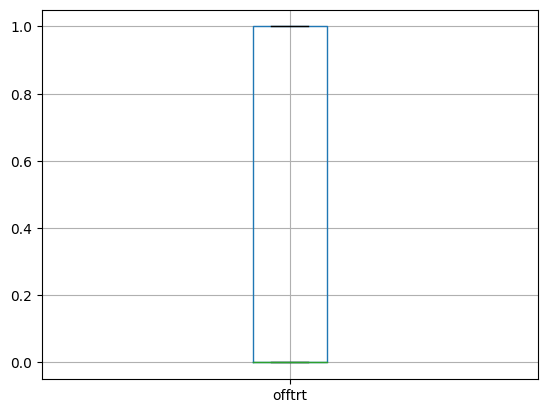

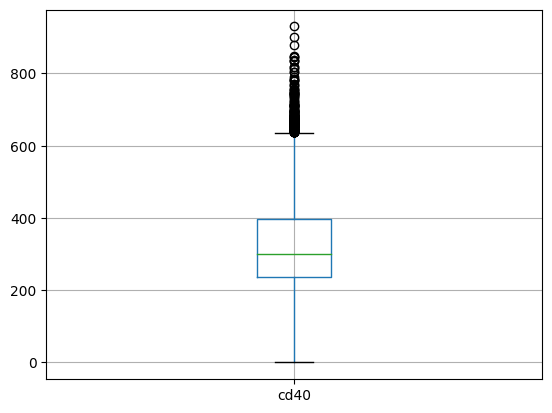

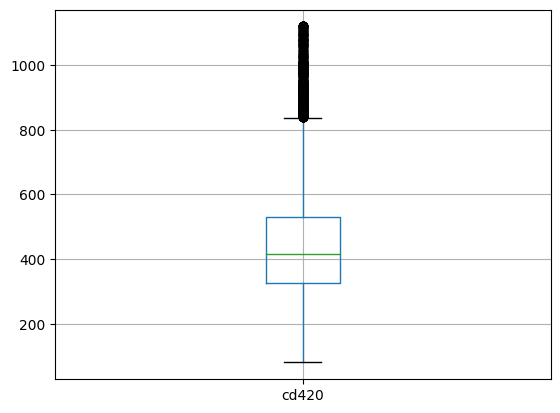

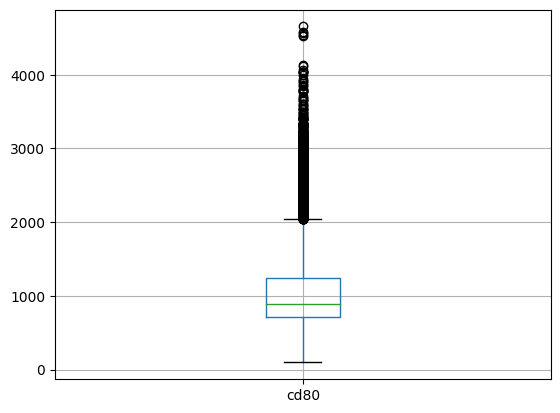

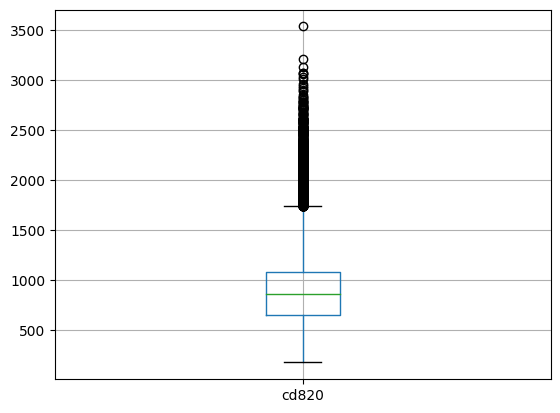

In [563]:
for column in df.columns:
  if column == "infected":
    continue
  else:
    plt.figure()
    df.boxplot(column)

In [564]:
def rm_sigma(df, column_name, sigma):
    mean = df[column_name].mean()
    std = df[column_name].std()
    thresh_up = mean + sigma * std
    thresh_down = mean - sigma * std
    df_ = df[(df[column_name] < thresh_up) & (df[column_name] > thresh_down)]
    return df_[column_name]

In [565]:
sigma=3

In [566]:
df['age'] = rm_sigma(df, 'age', sigma)
df['wtkg'] = rm_sigma(df, 'wtkg', sigma)
df['preanti'] = rm_sigma(df, 'preanti', sigma)
df['cd40'] = rm_sigma(df, 'cd40', sigma)
df['cd420'] = rm_sigma(df, 'cd420', sigma)
df['cd80'] = rm_sigma(df, 'cd80', sigma)
df['cd820'] = rm_sigma(df, 'cd820', sigma)

In [567]:
df.isna().sum()

,0
trt,0
age,274
wtkg,846
hemo,0
homo,0
drugs,0
karnof,0
oprior,0
z30,0
preanti,409


In [568]:
df = df.dropna()

In [569]:
df

,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1,37.0,79.46339,0,1,0,100,0,1,18.0,...,1,2,0,1,0,322.0,469.0,882.0,754.0,1
1,0,33.0,73.02314,0,1,0,90,0,1,224.0,...,1,3,1,1,1,168.0,575.0,1035.0,1525.0,1
2,1,43.0,69.47793,0,1,0,100,0,1,0.0,...,1,1,0,0,0,377.0,333.0,1147.0,1088.0,1
3,3,42.0,89.15934,0,1,0,100,1,1,513.0,...,1,3,0,0,0,238.0,324.0,775.0,1019.0,1
5,2,37.0,71.87923,0,1,0,90,0,1,238.0,...,1,2,0,1,1,520.0,543.0,740.0,694.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,46.0,61.28204,0,0,0,90,0,1,1089.0,...,1,3,0,1,1,234.0,402.0,481.0,1014.0,0
49996,0,42.0,73.36768,0,1,0,100,0,1,312.0,...,1,3,0,0,1,369.0,575.0,514.0,657.0,0
49997,0,40.0,78.75824,0,1,0,100,0,1,0.0,...,1,1,0,1,0,308.0,663.0,1581.0,863.0,0
49998,0,31.0,52.20371,0,0,0,100,0,1,0.0,...,1,1,0,1,1,349.0,440.0,470.0,865.0,1


## Balance Checking

In [570]:
df['infected'].value_counts()

,count
infected,
0,31971
1,14568


##SMOTE

In [571]:
X = df.drop(columns=['infected'])
y = df['infected']

In [572]:
sm = SMOTE(random_state=123)

In [573]:
X = df.drop(columns=['infected'])
y = df['infected']

In [574]:
y.value_counts()

,count
infected,
0,31971
1,14568


In [575]:
X_res, y_res = sm.fit_resample(X, y)

In [576]:
y_res.value_counts()

,count
infected,
1,31971
0,31971


## Split data

In [577]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=123)

#Correlation

In [578]:
corr= df.corr()

<Axes: >

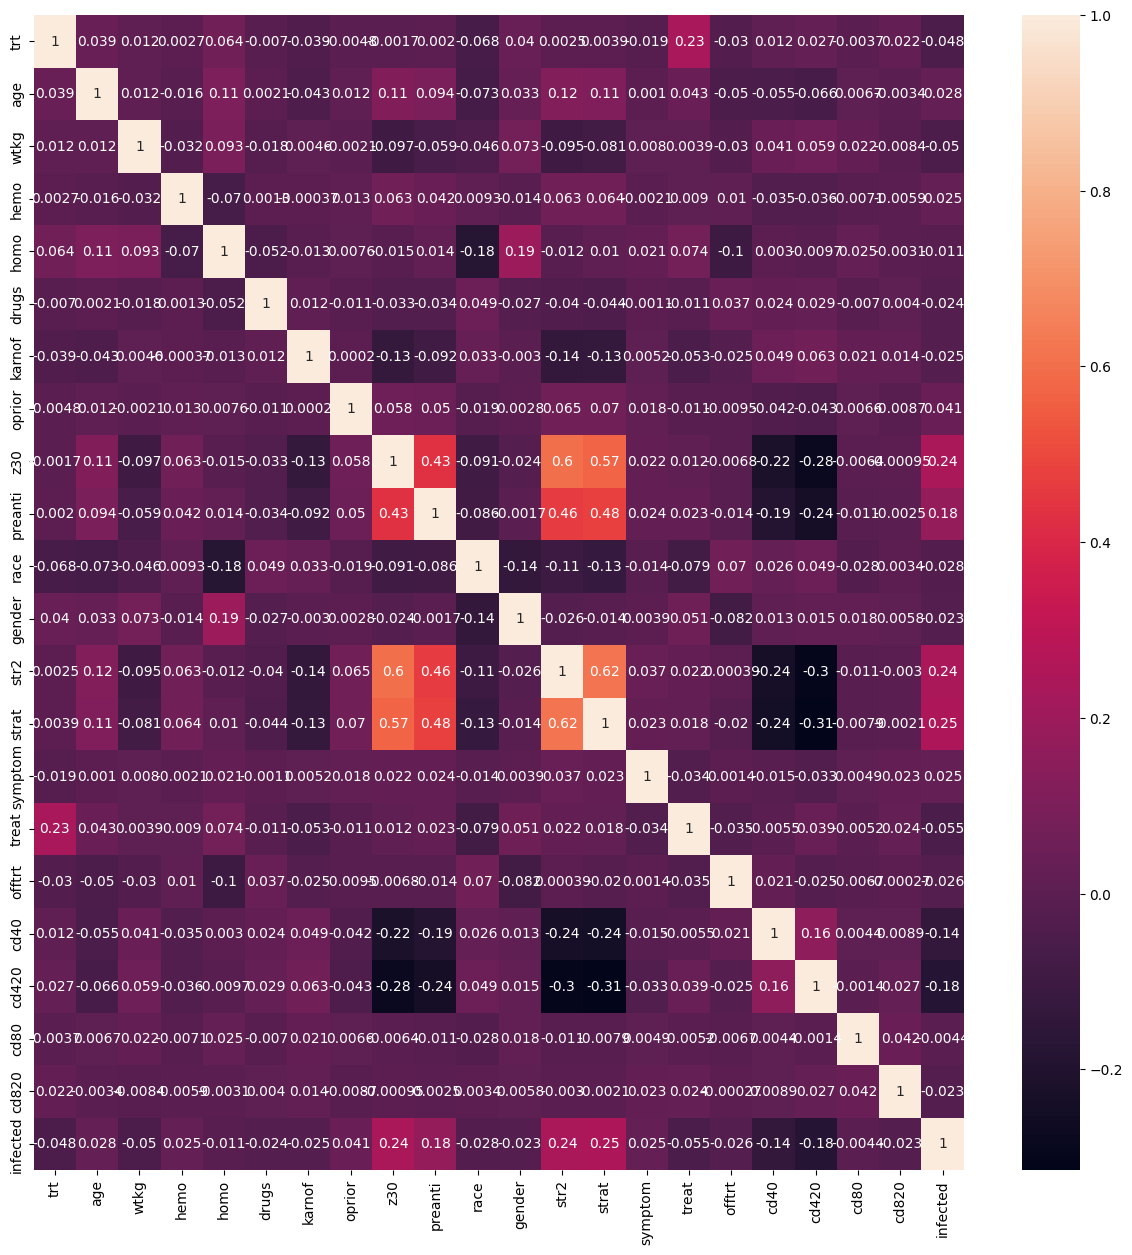

In [579]:
plt.figure(figsize= (15,15))
sns.heatmap(corr, annot=True)

There are no strongly correlated variables.

#Normalization

In [580]:
min_max_scaler = MinMaxScaler()

In [581]:
x_train_norm = min_max_scaler.fit_transform(X_train)

In [582]:
min_max_scaler.data_min_

array([  0.     ,  13.     ,  42.36162,   0.     ,   0.     ,   0.     ,
        76.     ,   0.     ,   0.     ,   0.     ,   0.     ,   0.     ,
         0.     ,   1.     ,   0.     ,   0.     ,   0.     ,  30.     ,
        81.     ,  96.     , 176.     ])

In [583]:
min_max_scaler.data_max_

array([3.0000000e+00, 5.5000000e+01, 1.1190007e+02, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00, 1.0000000e+02, 1.0000000e+00,
       1.0000000e+00, 1.5260000e+03, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 3.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 6.2600000e+02, 8.7200000e+02, 2.5110000e+03,
       1.9250000e+03])

In [584]:
x_test_norm = min_max_scaler.transform(X_test)

#Modeling

## Logistics Regression

In [585]:
model_LR = LogisticRegression()

In [586]:
model_LR.fit(x_train_norm, y_train)

LogisticRegression()

In [587]:
model_LR_pred_train = model_LR.predict(x_train_norm)

In [588]:
def plot_roc(model, X, y, label='TEST'):
    y_pred_proba = model.predict_proba(X)[:, 1]
    fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.title(f"ROC curve for {label} data")
    plt.show()
    print(roc_auc)

In [589]:
def evaluate(model, X, y, label='TEST'):
    pred = model.predict(X)
    cm = confusion_matrix(y, pred)
    print(f"{label} dataset")
    print(classification_report(y, pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Infected', 'Infected'], yticklabels=['Not Infected', 'Infected'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print('---------')
    plot_roc(model=model, X=X, y=y, label=label)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.69      0.68      0.68     25637
           1       0.68      0.69      0.68     25516

    accuracy                           0.68     51153
   macro avg       0.68      0.68      0.68     51153
weighted avg       0.68      0.68      0.68     51153



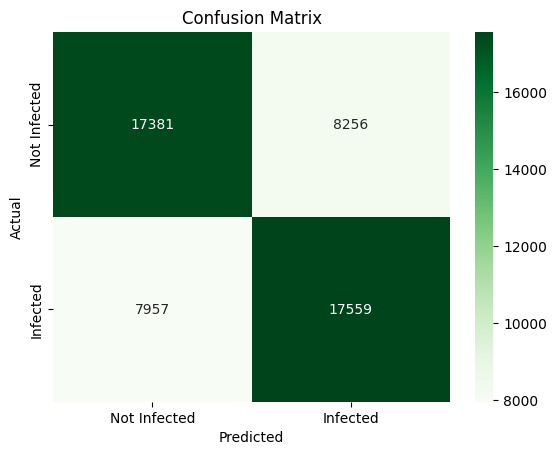

---------


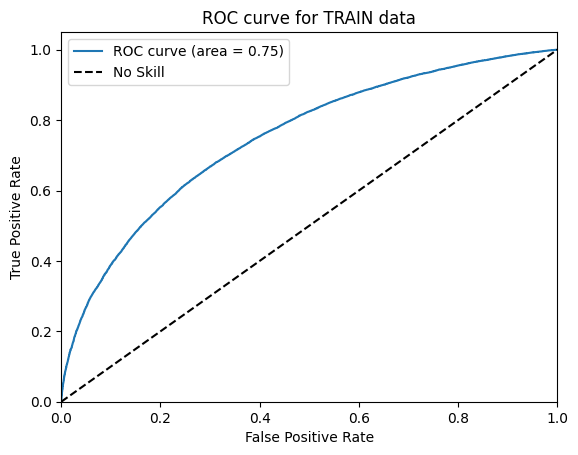

0.7495075194041709


In [590]:
evaluate(model=model_LR, X=x_train_norm, y=y_train, label='TRAIN')

In [591]:
model_LR_pred_test = model_LR.predict(x_test_norm)

Test dataset
              precision    recall  f1-score   support

           0       0.69      0.69      0.69      6334
           1       0.69      0.69      0.69      6455

    accuracy                           0.69     12789
   macro avg       0.69      0.69      0.69     12789
weighted avg       0.69      0.69      0.69     12789



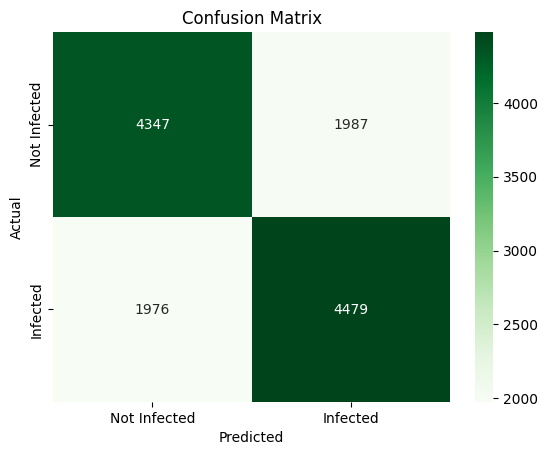

---------


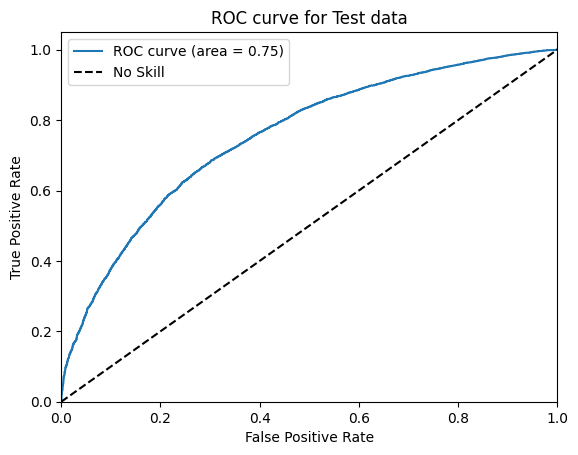

0.7539333663846057


In [592]:
evaluate(model=model_LR, X=x_test_norm, y=y_test, label='Test')

In [593]:
TN_LR, FP_LR, FN_LR, TP_LR = confusion_matrix(y_test, model_LR_pred_test).ravel()
acc_LR = accuracy_score(y_test, model_LR_pred_test)

##Naive Bayes

In [594]:
model_NB = GaussianNB()

In [595]:
model_NB.fit(x_train_norm, y_train)

GaussianNB()

In [596]:
model_NB_pred_train = model_NB.predict(x_train_norm)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.68      0.62      0.65     25637
           1       0.65      0.71      0.68     25516

    accuracy                           0.67     51153
   macro avg       0.67      0.67      0.66     51153
weighted avg       0.67      0.67      0.66     51153



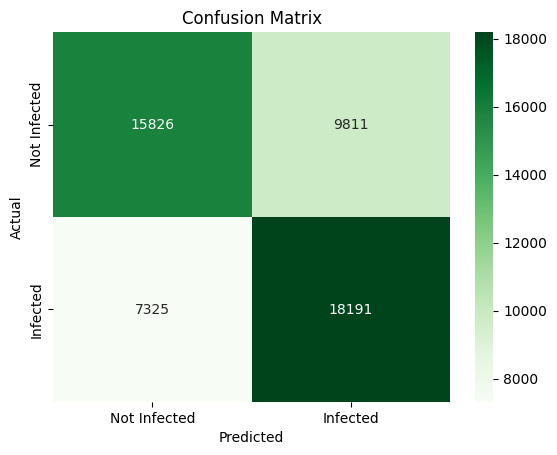

---------


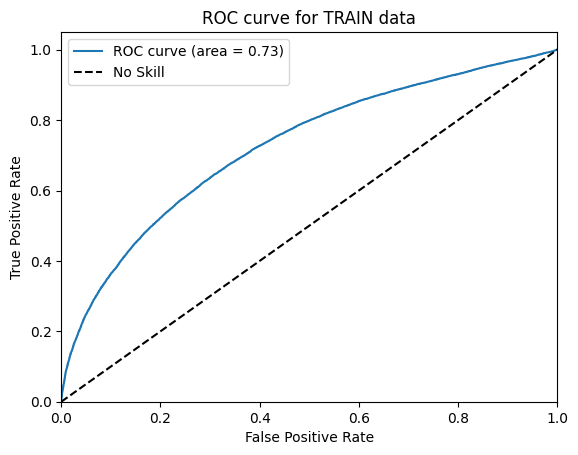

0.7253836641191043


In [597]:
evaluate(model=model_NB, X=x_train_norm, y=y_train, label='TRAIN')

TEST dataset
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      6334
           1       0.66      0.71      0.69      6455

    accuracy                           0.67     12789
   macro avg       0.67      0.67      0.67     12789
weighted avg       0.67      0.67      0.67     12789



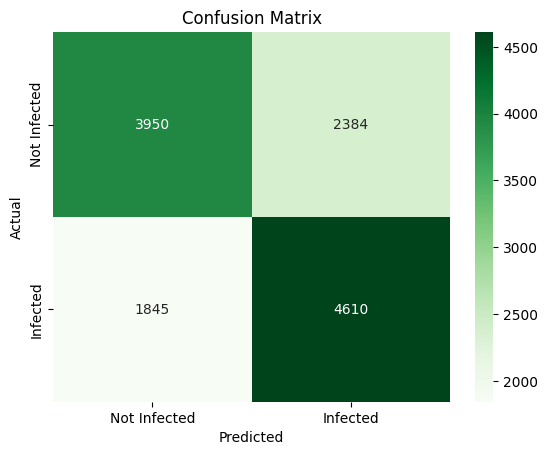

---------


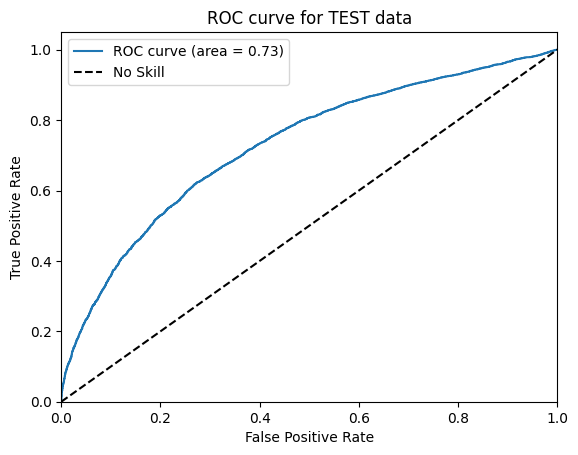

0.7277583239433967


In [598]:
evaluate(model=model_NB, X=x_test_norm, y=y_test, label='TEST')

In [599]:
model_NB_pred_test = model_NB.predict(x_test_norm)

In [600]:
TN_NB, FP_NB, FN_NB, TP_NB = confusion_matrix(y_test, model_NB_pred_test).ravel()
acc_NB = accuracy_score(y_test, model_NB_pred_test)

##Decision Tree Classifier

In [601]:
model_DT = DecisionTreeClassifier(max_depth=5, random_state=123)

In [602]:
model_DT.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=5, random_state=123)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.63      0.79      0.70     25637
           1       0.72      0.55      0.62     25516

    accuracy                           0.67     51153
   macro avg       0.68      0.67      0.66     51153
weighted avg       0.68      0.67      0.66     51153



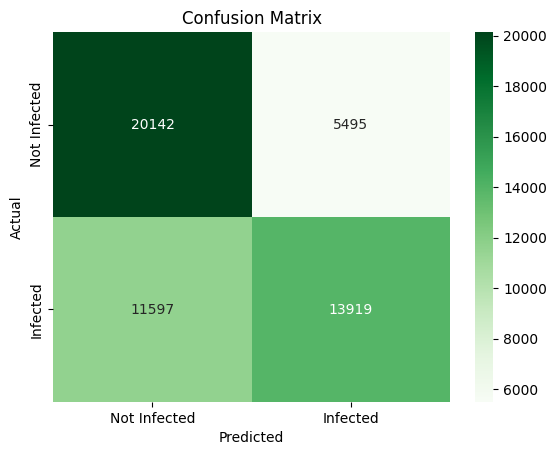

---------


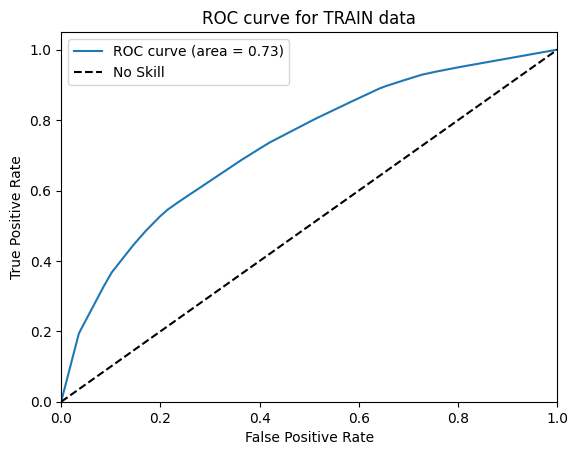

0.7283574270494219


In [603]:
evaluate(model=model_DT, X=x_train_norm, y=y_train, label='TRAIN')

In [604]:
model_DT_pred_train = model_DT.predict(x_train_norm)

TEST dataset
              precision    recall  f1-score   support

           0       0.63      0.77      0.69      6334
           1       0.71      0.55      0.62      6455

    accuracy                           0.66     12789
   macro avg       0.67      0.66      0.66     12789
weighted avg       0.67      0.66      0.66     12789



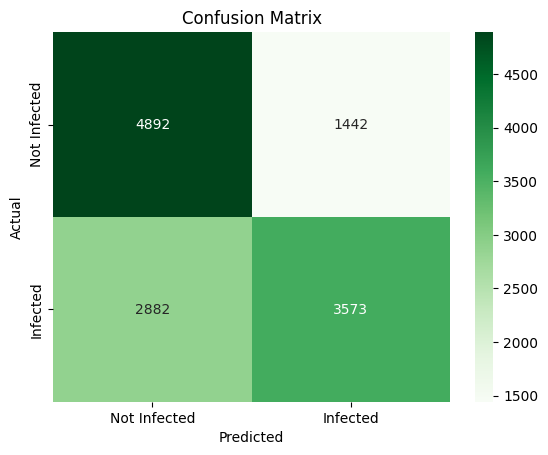

---------


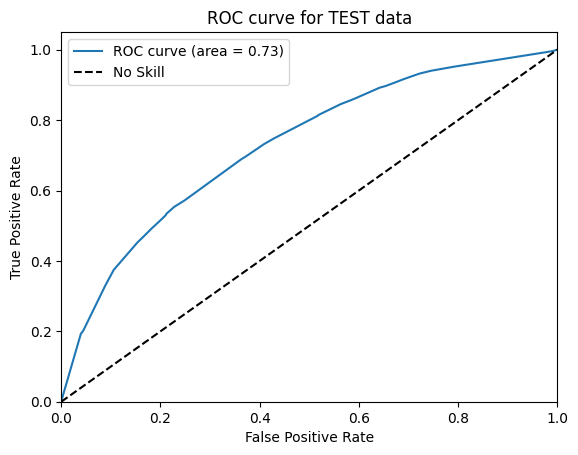

0.7281723657283905


In [605]:
evaluate(model=model_DT, X=x_test_norm, y=y_test, label='TEST')

In [606]:
model_DT_pred_test = model_DT.predict(x_test_norm)

In [607]:
TN_DT, FP_DT, FN_DT, TP_DT = confusion_matrix(y_test, model_DT_pred_test).ravel()
acc_DT = accuracy_score(y_test, model_DT_pred_test)

##Decision Tree Classifier with weights

In [608]:
model_DT_weight = DecisionTreeClassifier(max_depth=6,
                                         random_state=123,
                                         class_weight={0: 1, 1:2})

In [609]:
model_DT_weight.fit(x_train_norm, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 2}, max_depth=6, random_state=123)

In [610]:
model_DT_weight_pred_train = model_DT_weight.predict(x_train_norm)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.77      0.39      0.52     25637
           1       0.59      0.88      0.71     25516

    accuracy                           0.64     51153
   macro avg       0.68      0.64      0.61     51153
weighted avg       0.68      0.64      0.61     51153



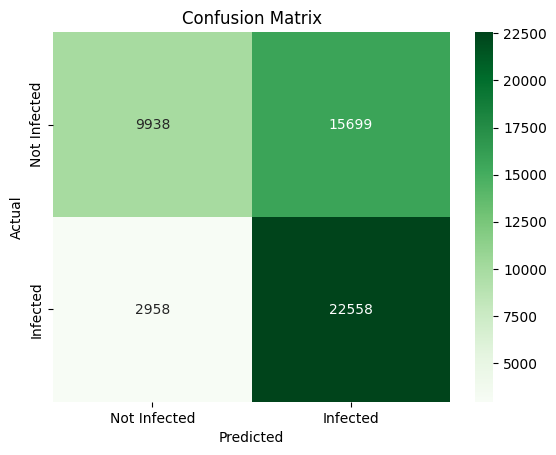

---------


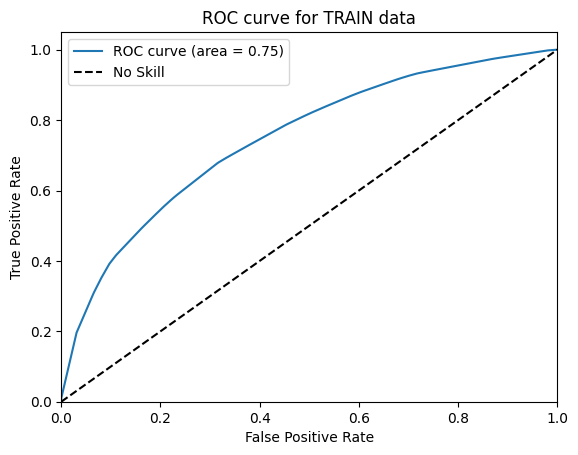

0.7463021893332066


In [611]:
evaluate(model=model_DT_weight, X=x_train_norm, y=y_train, label='TRAIN')

TEST dataset
              precision    recall  f1-score   support

           0       0.77      0.39      0.52      6334
           1       0.60      0.88      0.71      6455

    accuracy                           0.64     12789
   macro avg       0.68      0.64      0.62     12789
weighted avg       0.68      0.64      0.62     12789



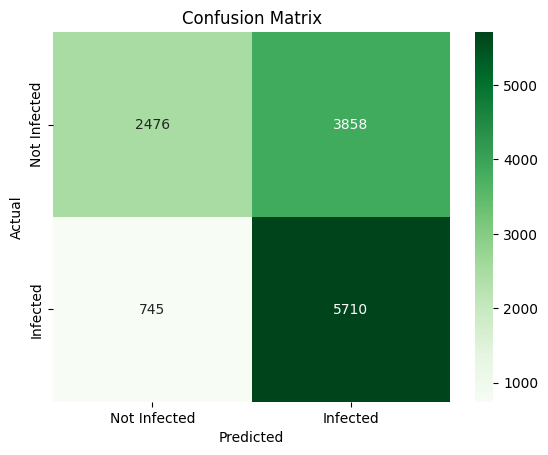

---------


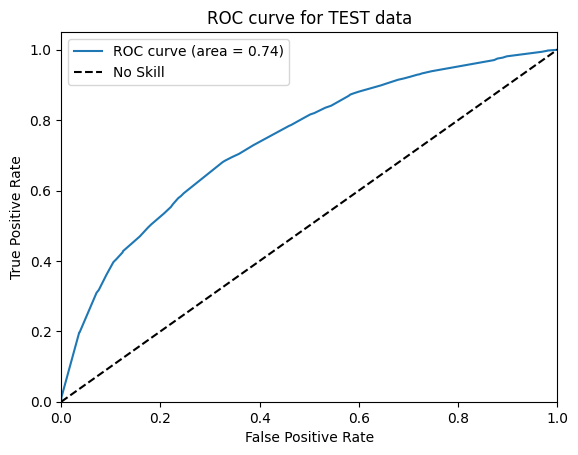

0.7396392943594098


In [612]:
evaluate(model=model_DT_weight, X=x_test_norm, y=y_test, label='TEST')

In [613]:
model_DT_weight_pred_test = model_DT_weight.predict(x_test_norm)

In [614]:
TN_DT_W, FP_DT_W, FN_DT_W, TP_DT_W = confusion_matrix(y_test, model_DT_weight_pred_test).ravel()
acc_DT_W = accuracy_score(y_test, model_DT_weight_pred_test)

##Random Forest Classifier

In [615]:
model_RF = RandomForestClassifier(n_estimators=50, max_depth=5,random_state=123)

In [616]:
model_RF.fit(x_train_norm, y_train)

RandomForestClassifier(max_depth=5, n_estimators=50, random_state=123)

In [617]:
model_RF_pred_train = model_RF.predict(x_train_norm)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.71      0.66      0.69     25637
           1       0.68      0.73      0.70     25516

    accuracy                           0.69     51153
   macro avg       0.70      0.69      0.69     51153
weighted avg       0.70      0.69      0.69     51153



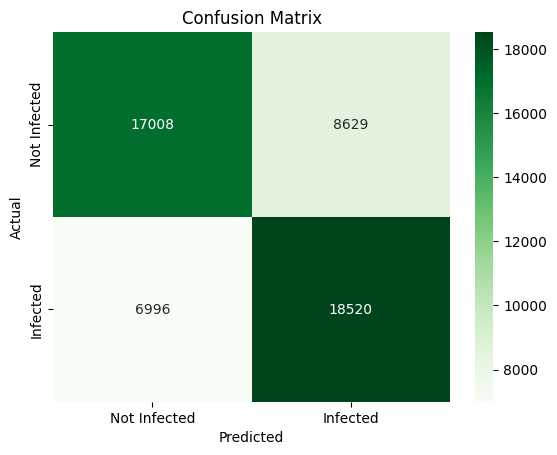

---------


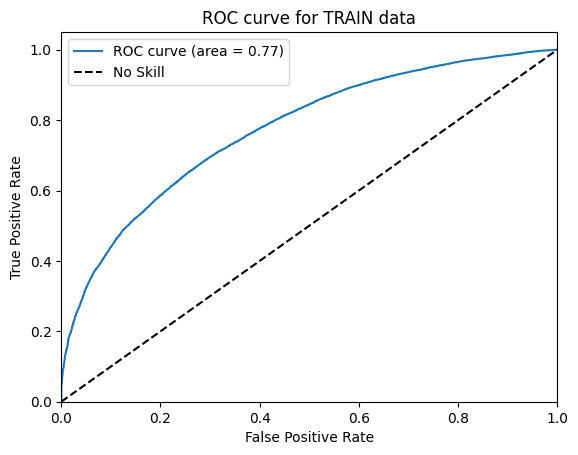

0.7724378096149307


In [618]:
evaluate(model=model_RF, X=x_train_norm, y=y_train, label='TRAIN')

TEST dataset
              precision    recall  f1-score   support

           0       0.71      0.66      0.68      6334
           1       0.69      0.74      0.71      6455

    accuracy                           0.70     12789
   macro avg       0.70      0.70      0.70     12789
weighted avg       0.70      0.70      0.70     12789



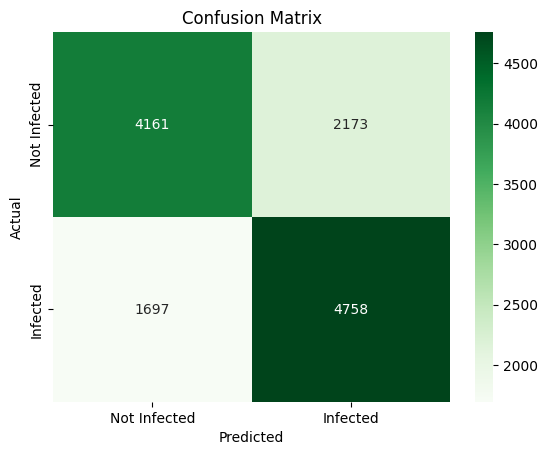

---------


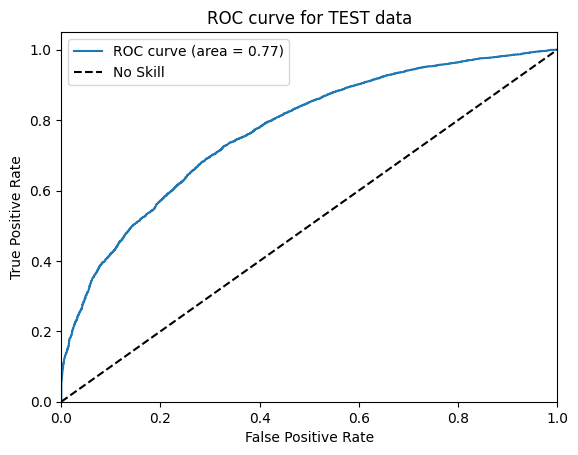

0.7703668886906683


In [619]:
evaluate(model=model_RF, X=x_test_norm, y=y_test, label='TEST')

In [620]:
model_RF_pred_test = model_RF.predict(x_test_norm)

In [621]:
TN_RF, FP_RF, FN_RF, TP_RF = confusion_matrix(y_test, model_RF_pred_test).ravel()
acc_RF = accuracy_score(y_test, model_RF_pred_test)

### Random Forest with Grid Search

In [622]:
params = {
    "n_estimators": [5, 38, 80, 100],
    "max_depth": [2, 8, 10],
    "random_state": [123],
    'min_samples_split': [2, 5],
    "criterion" :['gini', 'entropy']
}


In [623]:
RF_GridS = RandomForestClassifier()

In [624]:
GS = GridSearchCV(estimator=RF_GridS,
                  param_grid=params,
                  cv=5,
                  verbose=2)

In [625]:
GS.fit(x_train_norm, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=5, random_state=123; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=5, random_state=123; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=5, random_state=123; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=5, random_state=123; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=5, random_state=123; total time=   0.2s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=38, random_state=123; total time=   1.2s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=38, random_state=123; total time=   1.1s
[CV] END criterion=gini, max_depth=2, min_samples_split=2, n_estimators=38, random_state=123; total time=   0.8s
[CV] END criterion=gini, max_depth=2, m

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 8, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [5, 38, 80, 100],
                         'random_state': [123]},
             verbose=2)

In [626]:
GS.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=80,
                       random_state=123)

In [627]:
GS.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 80,
 'random_state': 123}

In [628]:
best_model = GS.best_estimator_

In [629]:
model_GS_pred_train = best_model.predict(x_train_norm)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.75      0.77      0.76     25637
           1       0.77      0.74      0.75     25516

    accuracy                           0.76     51153
   macro avg       0.76      0.76      0.76     51153
weighted avg       0.76      0.76      0.76     51153



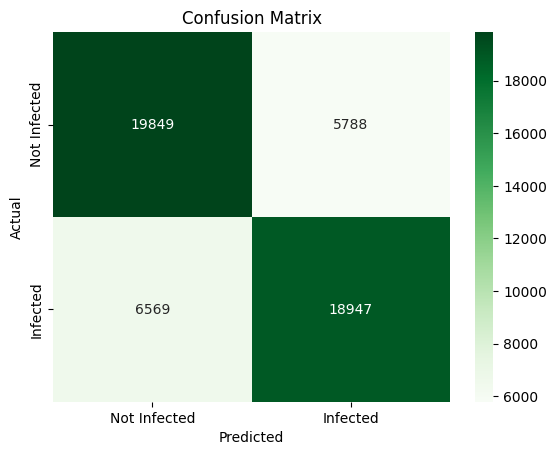

---------


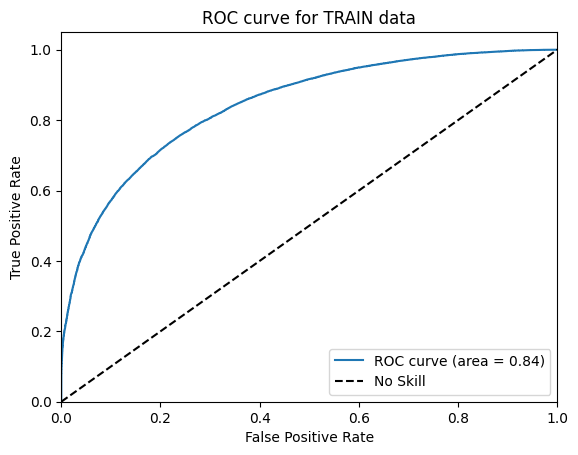

0.8433027708112363


In [630]:
evaluate(model=best_model, X=x_train_norm, y=y_train, label='TRAIN')

TEST dataset
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      6334
           1       0.72      0.71      0.72      6455

    accuracy                           0.71     12789
   macro avg       0.72      0.72      0.71     12789
weighted avg       0.72      0.71      0.71     12789



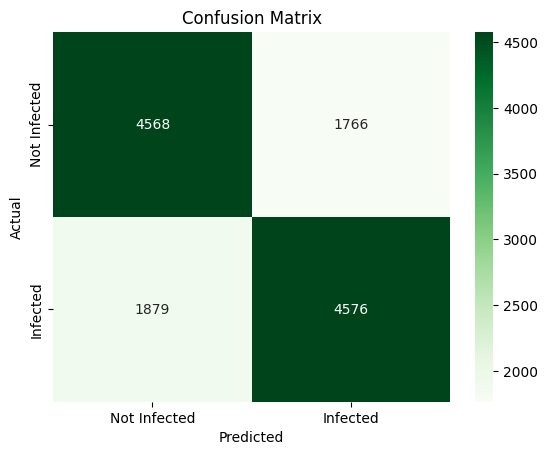

---------


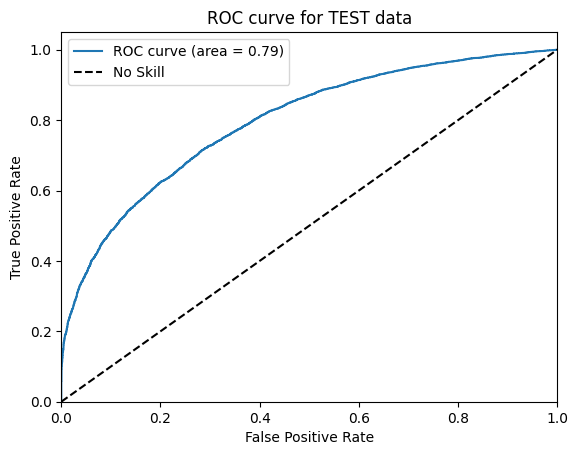

0.7946525666383848


In [631]:
evaluate(model=best_model, X=x_test_norm, y=y_test, label='TEST')

In [632]:
model_GS_pred_test = best_model.predict(x_test_norm)

In [633]:
TN_RF_GS, FP_RF_GS, FN_RF_GS, TP_RF_GS = confusion_matrix(y_test, model_GS_pred_test).ravel()
acc_RF_GS = accuracy_score(y_test, model_GS_pred_test)

## Multi-layer perceptron

In [634]:
x_train_norm.shape

(51153, 21)

In [635]:
model = Sequential([
    Dense(44, activation='relu', input_shape=(21,)),
    Dense(22, activation='relu'),
    Dense(11, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [636]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 44)                  │             968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 22)                  │             990 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 11)                  │             253 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,223 (8.68 KB)

 Trainable params: 2,223 (8.68 KB)

 Non-trainable params: 0 (0.00 B)

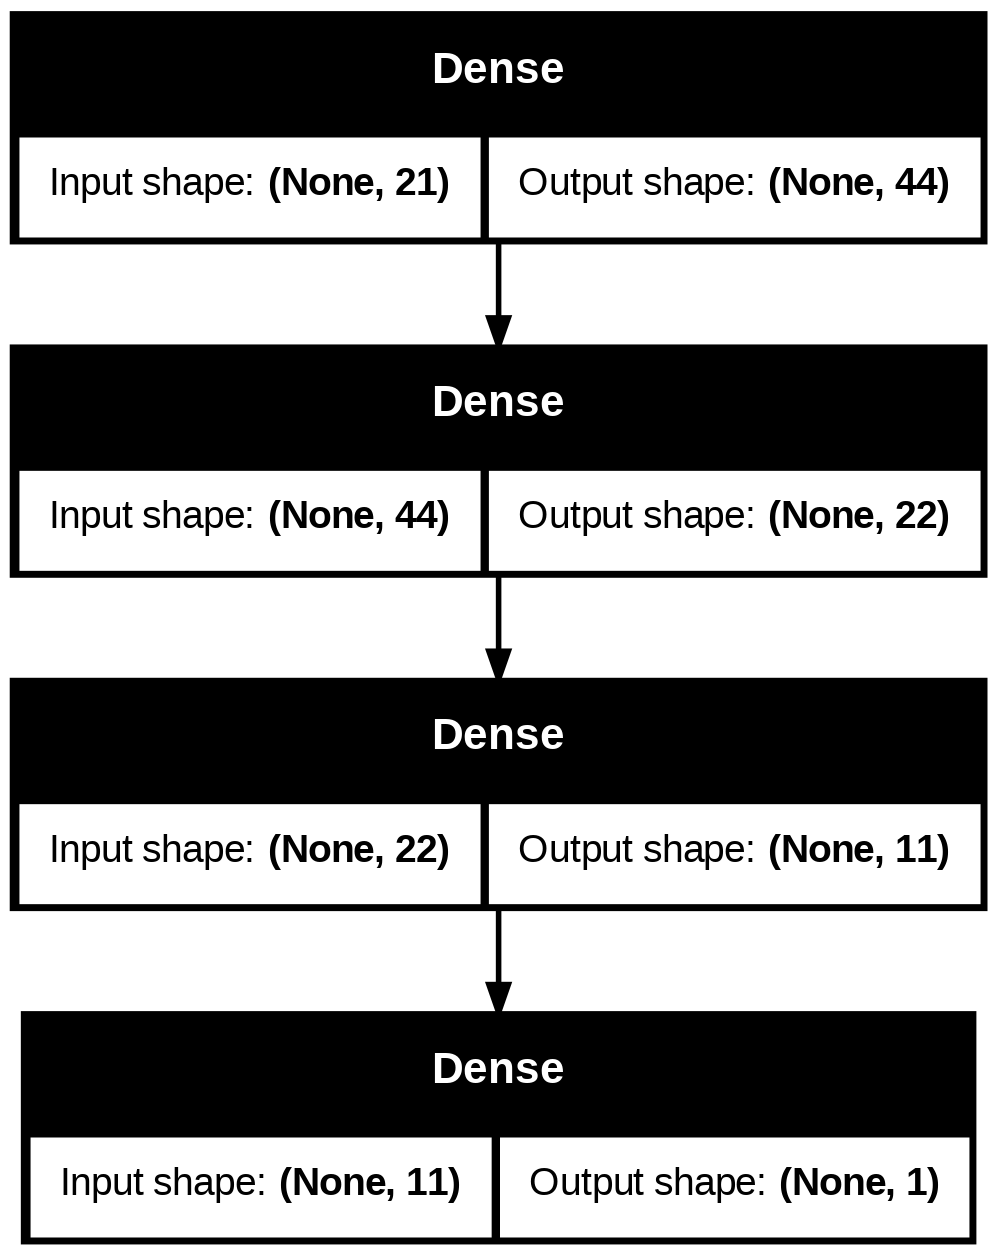

In [637]:
keras.utils.plot_model(model, show_shapes=True)

In [638]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [639]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [640]:
model.fit(x_train_norm, y_train, epochs=20, batch_size=128,callbacks=[callback])

Epoch 1/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6558 - loss: 0.6250
Epoch 2/20
 42/400 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6789 - loss: 0.5985

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6796 - loss: 0.5939
Epoch 3/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6856 - loss: 0.5856
Epoch 4/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6867 - loss: 0.5856
Epoch 5/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6859 - loss: 0.5860
Epoch 6/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6850 - loss: 0.5865
Epoch 7/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6891 - loss: 0.5812
Epoch 8/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6919 - loss: 0.5766
Epoch 9/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6982 - loss: 0.5737
Epoch 10/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6943 - loss: 0.5778
Epoch 11/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6959 - loss: 0.5737
Epoch 12/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6963 - loss: 0.5744
Epoch 13/20
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accurac

In [641]:
mlp_pred_train = (model.predict(x_train_norm) > 0.5).astype(int)

1599/1599 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [642]:
confusion_matrix(y_train, mlp_pred_train)

array([[18911,  6726],
       [ 8628, 16888]])

In [643]:
print(classification_report(y_train, mlp_pred_train))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71     25637
           1       0.72      0.66      0.69     25516

    accuracy                           0.70     51153
   macro avg       0.70      0.70      0.70     51153
weighted avg       0.70      0.70      0.70     51153



In [644]:
mlp_pred_test = (model.predict(x_test_norm) > 0.5).astype(int)

400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [645]:
confusion_matrix(y_test, mlp_pred_test)

array([[4583, 1751],
       [2176, 4279]])

In [646]:
print(classification_report(y_test, mlp_pred_test))

              precision    recall  f1-score   support

           0       0.68      0.72      0.70      6334
           1       0.71      0.66      0.69      6455

    accuracy                           0.69     12789
   macro avg       0.69      0.69      0.69     12789
weighted avg       0.69      0.69      0.69     12789



In [647]:
TN_MLP, FP_MLP, FN_MLP, TP_MLP = confusion_matrix(y_test, mlp_pred_test).ravel()
acc_MLP = accuracy_score(y_test, mlp_pred_test)

##Xtreme Gradient Boosting

In [648]:
from xgboost import XGBClassifier

In [649]:
model_XG = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=123)

In [650]:
model_XG.fit(x_train_norm, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:12:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=123, ...)

In [651]:
model_XG_pred_train = model_XG.predict(x_train_norm)

TRAIN dataset
              precision    recall  f1-score   support

           0       0.80      0.90      0.85     25637
           1       0.89      0.77      0.82     25516

    accuracy                           0.84     51153
   macro avg       0.84      0.84      0.83     51153
weighted avg       0.84      0.84      0.83     51153



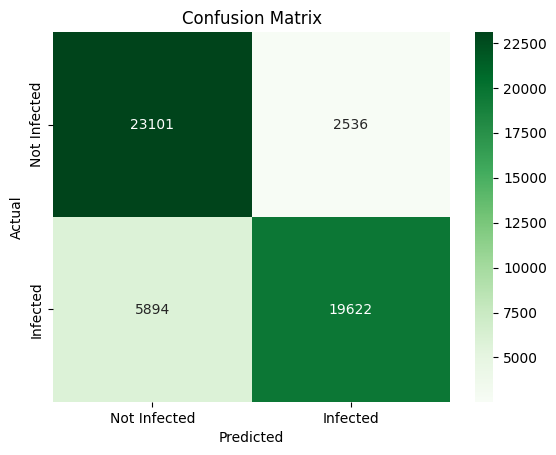

---------


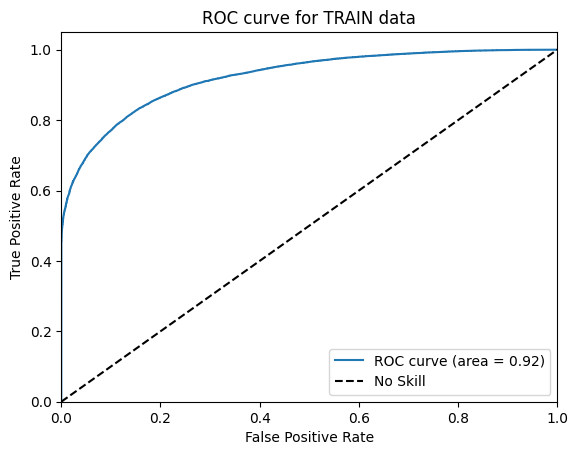

0.9221754908325122


In [652]:
evaluate(model=model_XG, X=x_train_norm, y=y_train, label='TRAIN')

In [653]:
model_XG_pred_test = model_XG.predict(x_test_norm)

TEST dataset
              precision    recall  f1-score   support

           0       0.72      0.81      0.76      6334
           1       0.79      0.69      0.74      6455

    accuracy                           0.75     12789
   macro avg       0.76      0.75      0.75     12789
weighted avg       0.76      0.75      0.75     12789



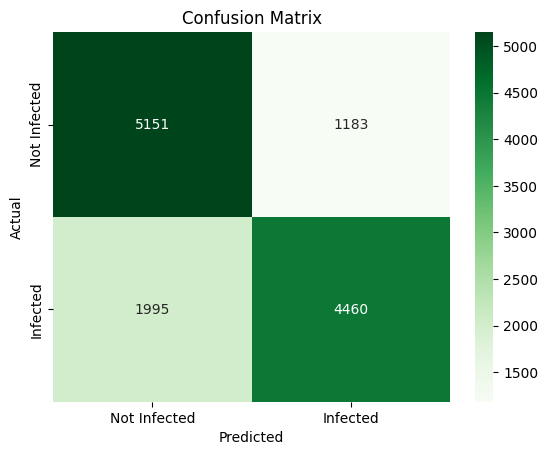

---------


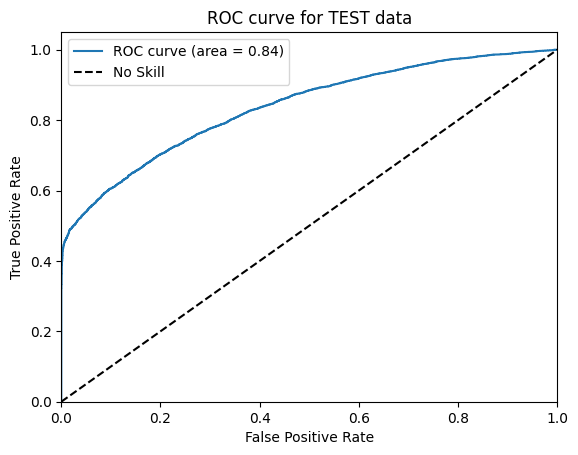

0.8370704669596931


In [654]:
evaluate(model=model_XG, X=x_test_norm, y=y_test, label='TEST')

In [655]:
TN_XG, FP_XG, FN_XG, TP_XG = confusion_matrix(y_test, model_XG_pred_test).ravel()
acc_XG = accuracy_score(y_test, model_XG_pred_test)

#Conclusion

In [656]:
results = {"Model": ["Logistics Regression", "Naive Bayes", "Decision Tree Classifier", "Decision Tree Classifier with weights","Random Forest Classifier", "Random Forest Grid Search", "MLP","XGBoost"],
           "TN": [TN_LR, TN_NB, TN_DT,TN_DT_W, TN_RF, TN_RF_GS, TN_MLP,TN_XG],
           "FP": [FP_LR, FP_NB, FP_DT, FP_DT_W, FP_RF, FP_RF_GS, FP_MLP, FP_XG],
           "FN": [FN_LR, FN_NB, FN_DT, FN_DT_W, FN_RF, FN_RF_GS, FN_MLP, FN_XG],
           "TP": [TP_LR, TP_NB, TP_DT, TP_DT_W, TP_RF, TP_RF_GS, TP_MLP, TP_XG],
           "Accuracy_score": [acc_LR, acc_NB, acc_DT, acc_DT_W, acc_RF, acc_RF_GS, acc_MLP, acc_XG],
          }

In [657]:
df_results = pd.DataFrame(results)

In [658]:
df_results.set_index("Model")

,TN,FP,FN,TP,Accuracy_score
Model,,,,,
Logistics Regression,4347,1987,1976,4479,0.690124
Naive Bayes,3950,2384,1845,4610,0.669325
Decision Tree Classifier,4892,1442,2882,3573,0.661897
Decision Tree Classifier with weights,2476,3858,745,5710,0.640081
Random Forest Classifier,4161,2173,1697,4758,0.697396
Random Forest Grid Search,4568,1766,1879,4576,0.714989
MLP,4583,1751,2176,4279,0.692939
XGBoost,5151,1183,1995,4460,0.751505


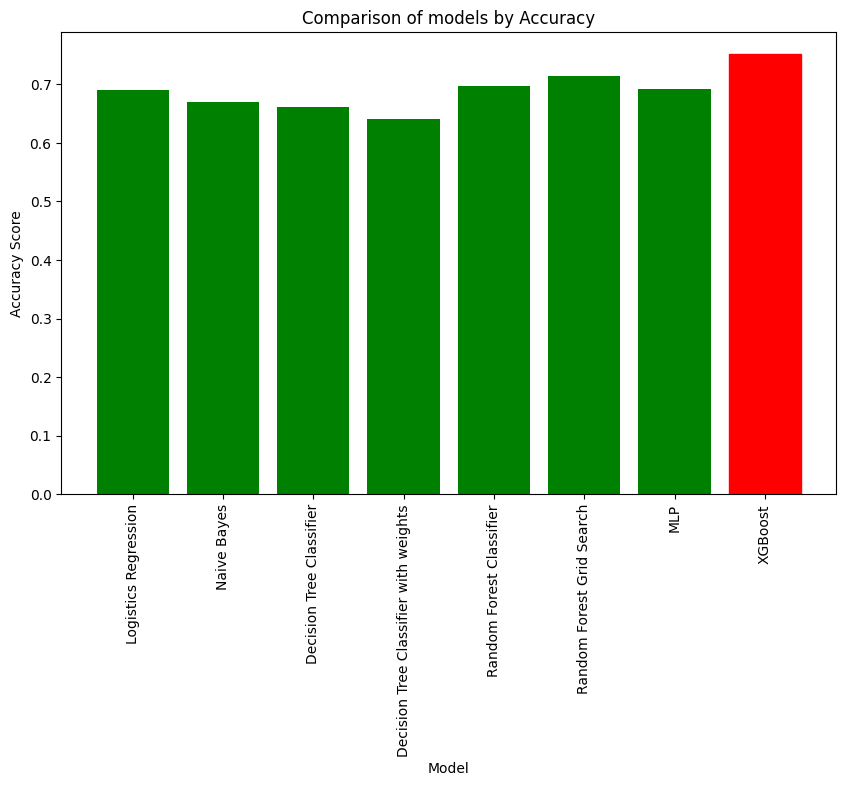

In [659]:
accuracy_list = [acc_LR, acc_NB, acc_DT, acc_DT_W, acc_RF, acc_RF_GS, acc_MLP, acc_XG]
highest_accuracy = accuracy_list.index(max(accuracy_list))
plt.figure(figsize = (10, 6))
bars = plt.bar(df_results["Model"],
            df_results["Accuracy_score"],
            color ='green')
bars[highest_accuracy].set_color('red')
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title('Comparison of models by Accuracy')
plt.xticks(rotation=90);